Research:
https://medium.com/analytics-vidhya/using-machine-learning-to-predict-flight-delays-e8a50b0bb64c

Another possible data set to use instead
https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018


### Will the flight be delayed at the destination?

In [66]:
import pandas as pd

df = pd.read_csv('nyc-flights.csv',
                 parse_dates= {"date" : ["year","month","day"]},
                keep_date_col=False)

In [67]:
df.sort_values(by='date', inplace=True)

### Modify and add new categorical variables

In [68]:
#https://stackoverflow.com/questions/32278728/convert-dataframe-date-row-to-a-weekend-not-weekend-value/32280195
# Adding a new weekday variable - 1 means weekday, 2 means weekend
df['weekday'] = (df['date'].dt.dayofweek < 5).astype(float)
df[['weekday']].value_counts()

weekday
1.0        24384
0.0         8351
dtype: int64

In [69]:
df.head()

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday
23577,2013-01-01,855,-4,1143,-2,DL,N646DL,1747,LGA,ATL,129,762,8,55,1.0
2903,2013-01-01,1529,-1,1733,-4,US,N738US,1665,LGA,CLT,103,544,15,29,1.0
702,2013-01-01,753,-2,1056,-14,AA,N3HMAA,2267,LGA,MIA,157,1096,7,53,1.0
2951,2013-01-01,1701,-9,2026,11,AA,N3FUAA,695,JFK,AUS,247,1521,17,1,1.0
14643,2013-01-01,1603,-2,1818,28,MQ,N730MQ,4415,LGA,RDU,79,431,16,3,1.0


In [82]:
df.dtypes

date         datetime64[ns]
dep_time              int64
dep_delay             int64
arr_time              int64
arr_delay             int64
carrier              object
tailnum              object
flight                int64
origin               object
dest                 object
air_time              int64
distance              int64
hour                  int64
minute                int64
weekday             float64
dtype: object

In [90]:
# hour 5 am-12 pm morning [5-12]
# 12-17 afternoon [12-5]
# 17 - 23 pm evening [5-11]
# 23 - 5 am redeye [11-5]
import math
import numpy as np
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
    
df['dep_time_hour'] = ((df['dep_time']/100).astype('int'))

conditions = [
    (df['dep_time_hour'] >= 5) & (df['dep_time_hour'] < 12),
    (df['dep_time_hour'] >= 12) & (df['dep_time_hour'] < 17),
    (df['dep_time_hour'] >= 17) & (df['dep_time_hour'] < 23),
    (df['dep_time_hour'] >= 23) & (df['dep_time_hour'] < 5)
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'afternoon', 'evening', 'red-eye']

# create a new column and use np.select to assign values to it using our lists as arguments
df['dep_time_category'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday,dep_time_category,dep_time_hour
23577,2013-01-01,855,-4,1143,-2,DL,N646DL,1747,LGA,ATL,129,762,8,55,1.0,morning,8
2903,2013-01-01,1529,-1,1733,-4,US,N738US,1665,LGA,CLT,103,544,15,29,1.0,afternoon,15
702,2013-01-01,753,-2,1056,-14,AA,N3HMAA,2267,LGA,MIA,157,1096,7,53,1.0,morning,7
2951,2013-01-01,1701,-9,2026,11,AA,N3FUAA,695,JFK,AUS,247,1521,17,1,1.0,evening,17
14643,2013-01-01,1603,-2,1818,28,MQ,N730MQ,4415,LGA,RDU,79,431,16,3,1.0,afternoon,16


In [91]:
# arrival time
import math
import numpy as np
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
    
df['arr_time_hour'] = ((df['arr_time']/100).astype('int'))

conditions = [
    (df['arr_time_hour'] >= 5) & (df['arr_time_hour'] < 12),
    (df['arr_time_hour'] >= 12) & (df['arr_time_hour'] < 17),
    (df['arr_time_hour'] >= 17) & (df['arr_time_hour'] < 23),
    (df['arr_time_hour'] >= 23) & (df['arr_time_hour'] < 5)
    ]

# create a list of the values we want to assign for each condition
values = ['morning', 'afternoon', 'evening', 'red-eye']

# create a new column and use np.select to assign values to it using our lists as arguments
df['arr_time_category'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday,dep_time_category,dep_time_hour,arr_time_hour,arr_time_category
23577,2013-01-01,855,-4,1143,-2,DL,N646DL,1747,LGA,ATL,129,762,8,55,1.0,morning,8,11,morning
2903,2013-01-01,1529,-1,1733,-4,US,N738US,1665,LGA,CLT,103,544,15,29,1.0,afternoon,15,17,evening
702,2013-01-01,753,-2,1056,-14,AA,N3HMAA,2267,LGA,MIA,157,1096,7,53,1.0,morning,7,10,morning
2951,2013-01-01,1701,-9,2026,11,AA,N3FUAA,695,JFK,AUS,247,1521,17,1,1.0,evening,17,20,evening
14643,2013-01-01,1603,-2,1818,28,MQ,N730MQ,4415,LGA,RDU,79,431,16,3,1.0,afternoon,16,18,evening


In [94]:
new_df = df.drop(columns=['tailnum', 'flight','hour','minute','dep_time_hour','arr_time_hour','dep_time','arr_time'])


In [95]:
new_df.head()

,date,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,weekday,dep_time_category,arr_time_category
23577,2013-01-01,-4,-2,DL,LGA,ATL,129,762,1.0,morning,morning
2903,2013-01-01,-1,-4,US,LGA,CLT,103,544,1.0,afternoon,evening
702,2013-01-01,-2,-14,AA,LGA,MIA,157,1096,1.0,morning,morning
2951,2013-01-01,-9,11,AA,JFK,AUS,247,1521,1.0,evening,evening
14643,2013-01-01,-2,28,MQ,LGA,RDU,79,431,1.0,afternoon,evening


In [96]:
new_df['dest'].value_counts

<bound method IndexOpsMixin.value_counts of 23577    ATL
2903     CLT
702      MIA
2951     AUS
14643    RDU
        ... 
19776    DCA
3849     ORF
5562     FLL
2742     ATL
26857    FLL
Name: dest, Length: 32735, dtype: object>

<AxesSubplot:>

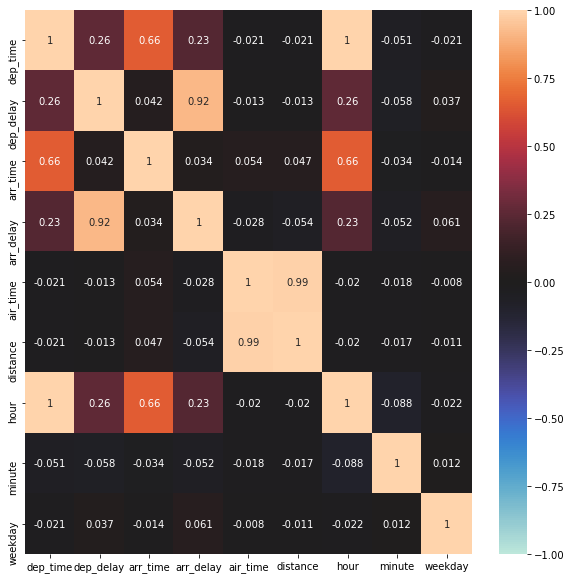

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1, center= 0, ax=ax)

/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


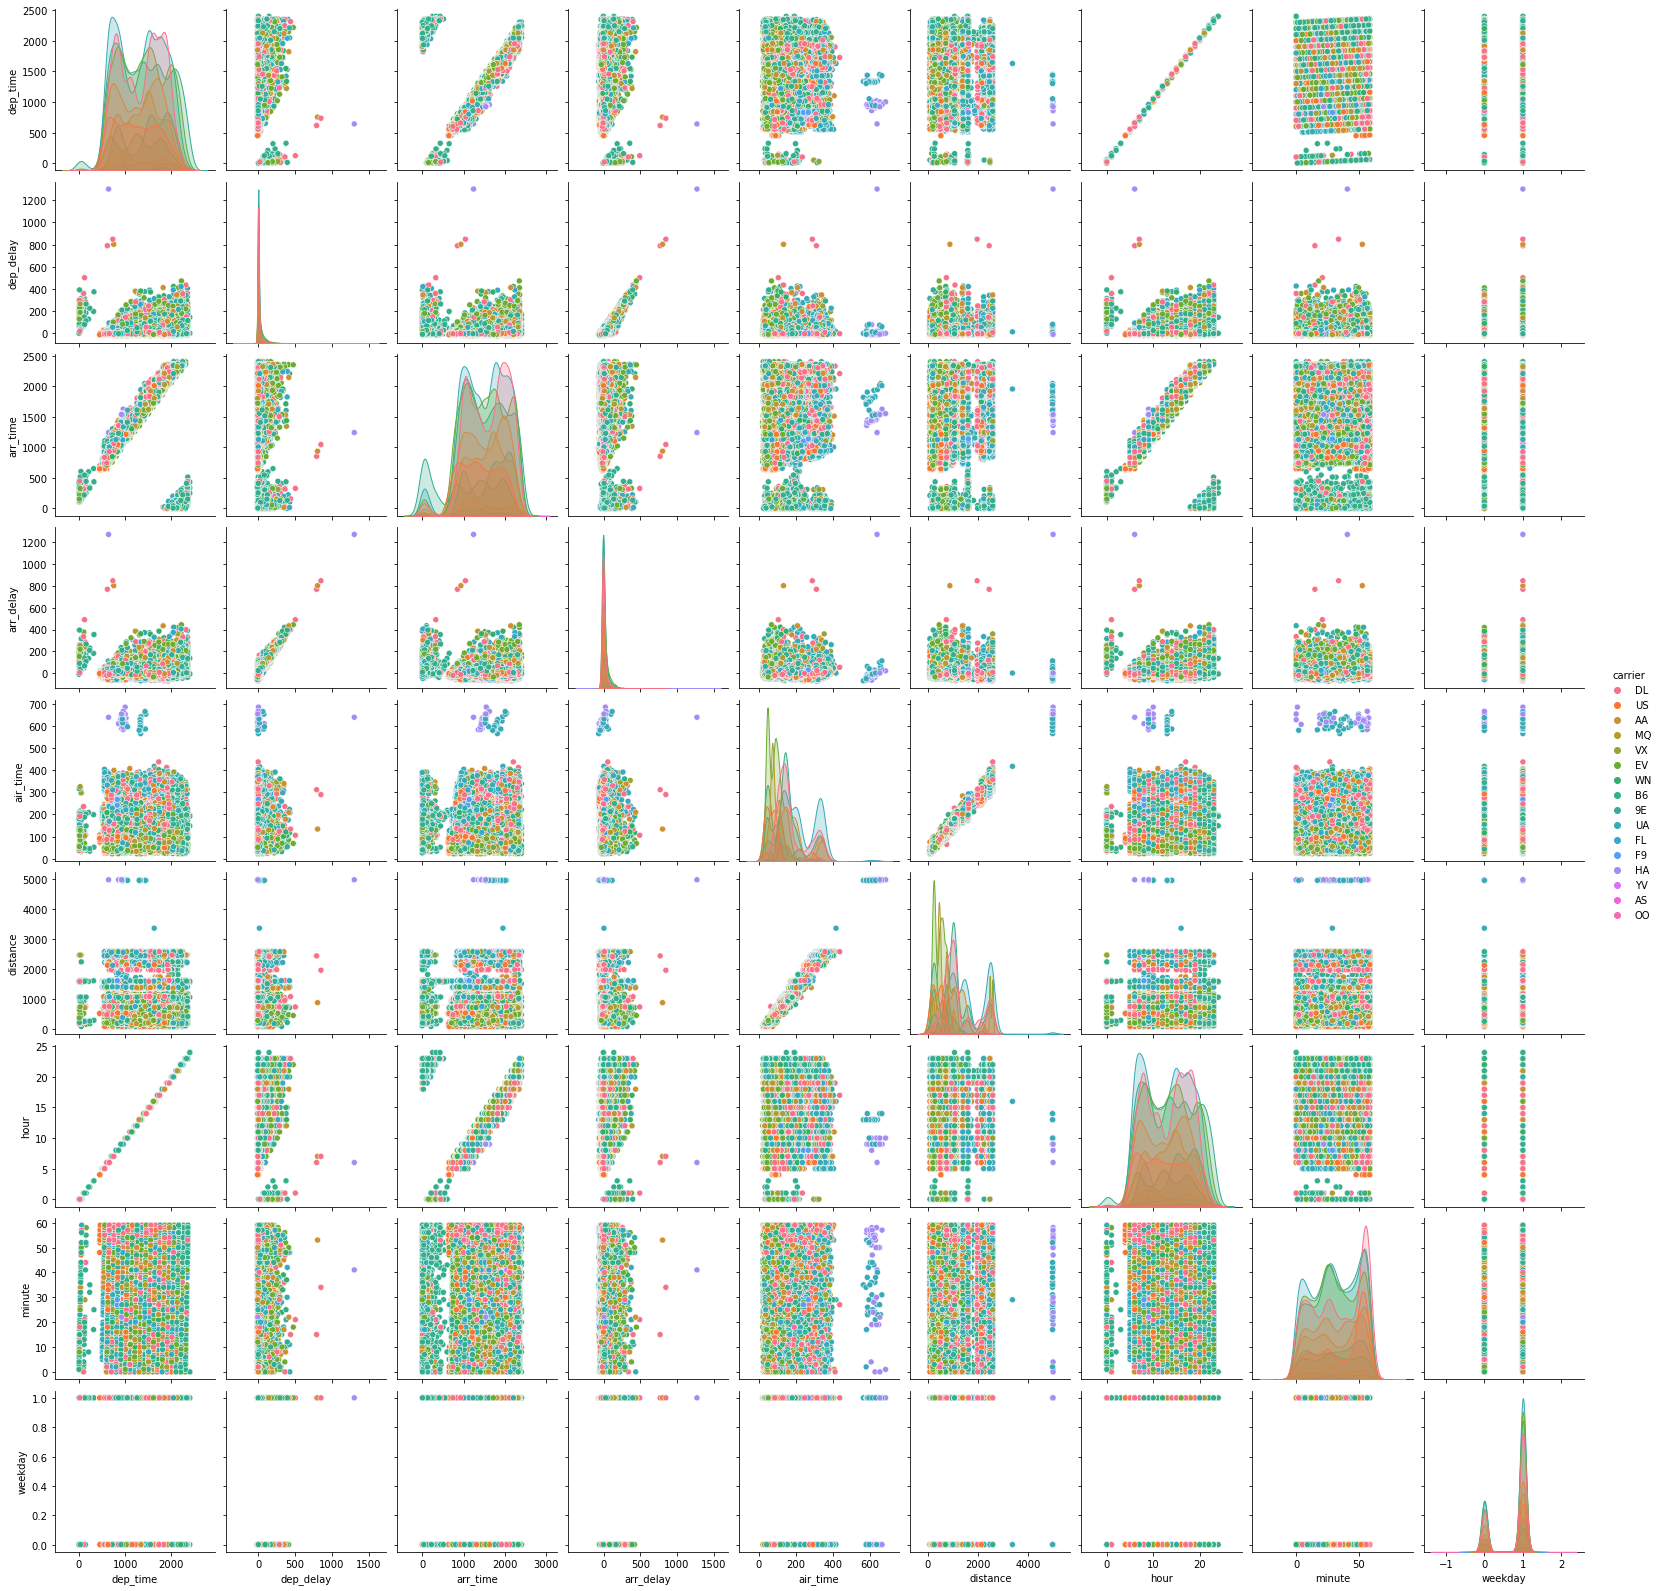

In [77]:
sns.pairplot(new_df, hue='carrier')

principal component analysis
subtract arrival time from departure time

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
